<a href="https://colab.research.google.com/github/tjdahlke/fishcam/blob/main/Fish_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fish Detector

We need to be able to properly detect fish if we are going to track and count them. This means we need to do a few things to have a trained fish detector:

    Build a training data set
    Train a detector using said data
    Deploy model for real time inference / counting upstream + downstream passage.


## Initialize

In [1]:
ROOT_PATH = "/content/drive/MyDrive/fishcam"
RUN_PATH = ROOT_PATH + "/yolov5"
RAW_DATA = ROOT_PATH + "/training_data"
WRKING_DATA = ROOT_PATH + "/working_data"

### Get access to data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!rm -rf /content/sample_data/

### Get YoloV5 repo

In [ ]:
# Clone YOLOv5 code
%cd $ROOT_PATH
!git clone https://github.com/ultralytics/yolov5.git #https://github.com/rkuo2000/yolov5
%cd $RUN_PATH
%pip install -qr requirements.txt  # install dependencies
import torch
from IPython.display import Image, clear_output  # to display images
clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

### Setup configuration file

In [ ]:
!echo "train: $WRKING_DATA/train/images" > $RUN_PATH/data/alpr.yaml
!echo "val:   $WRKING_DATA/val/images" >> $RUN_PATH/data/alpr.yaml

!echo "nc : 1" >> $RUN_PATH/data/alpr.yaml
!echo "names: ['salmon_top']" >> $RUN_PATH/data/alpr.yaml

!cat $RUN_PATH/data/alpr.yaml

In [43]:
# Make training dataset
!rm -rf $WRKING_DATA/*
!mkdir -p $WRKING_DATA/train/images $WRKING_DATA/train/labels
!cp -n $RAW_DATA/images/*.jpg $WRKING_DATA/train/images/.
!cp -n $RAW_DATA/labels/*.txt $WRKING_DATA/train/labels/.

# Make validation dataset
!mkdir -p $WRKING_DATA/val/images $WRKING_DATA/val/labels
!mv $WRKING_DATA/train/images/*1.jpg $WRKING_DATA/val/images/.
!mv $WRKING_DATA/train/labels/*1.txt $WRKING_DATA/val/labels/.

## Training

In [ ]:
# Start weights and biases (optional)
%pip install -q wandb
import wandb
wandb.login()

In [ ]:
%cd $RUN_PATH
!python train.py --img 320 --batch 24 --epochs 30 --data $RUN_PATH/data/alpr.yaml --cfg $RUN_PATH/models/yolov5s.yaml

## Inference

In [ ]:
!python detect.py --source $WRKING_DATA/val/images --conf 0.5 --img 320 --weights $RUN_PATH/runs/train/exp13/weights/best.pt --save-txt

## Display a sample image result



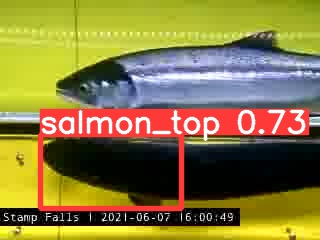

In [10]:
from IPython.display import Image
Image('/content/drive/MyDrive/fishcam/yolov5/runs/detect/exp/thumb-fishvid_0-0021.jpg')